# Plot Province, China

In [ ]:
# 

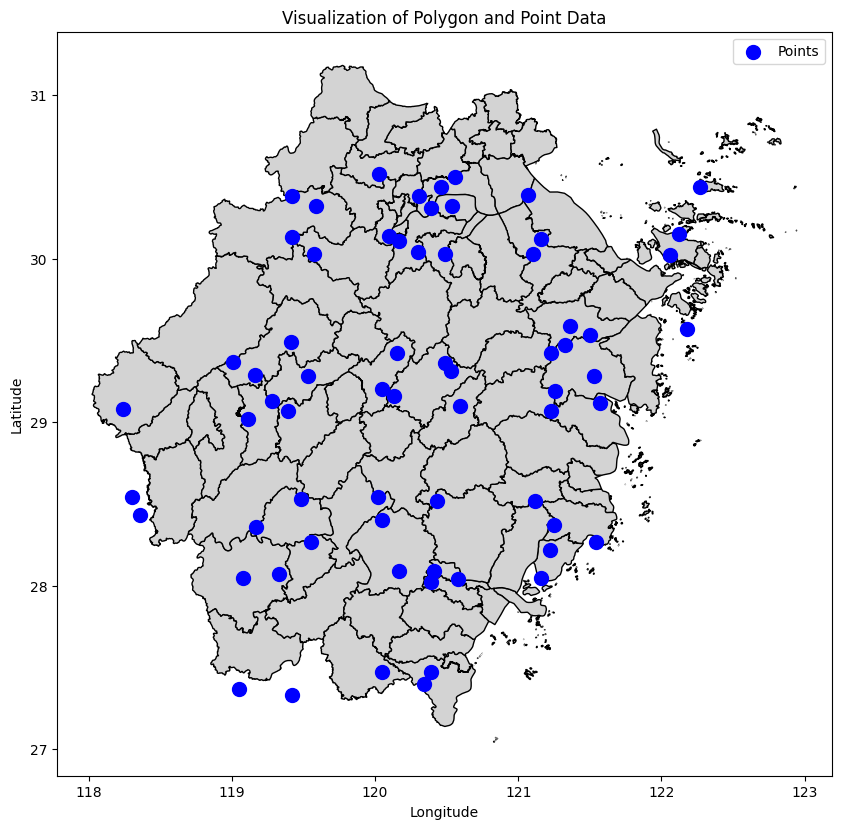

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Replace with the actual paths to your shapefiles
polygon_shp_path = r'C:\Datasets\ZheJiang\Xian.shp'
point_shp_path = r'C:\Datasets\ZheJiang\Observation_Site.shp'

# Read the shapefiles
polygon_gdf = gpd.read_file(polygon_shp_path)
point_gdf = gpd.read_file(point_shp_path)

# Reproject point data to match the coordinate system of the polygon data
#point_gdf = point_gdf.to_crs(polygon_gdf.crs)
polygon_gdf = polygon_gdf.to_crs(point_gdf.crs)
# Point size for the point shapefile
pt_size = 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot polygon data
polygon_gdf.plot(ax=ax, color='lightgray', edgecolor='black', label='Polygon')

# Plot point data on top
point_gdf.plot(ax=ax, markersize=pt_size, color='blue', label='Points')

plt.title('Visualization of Polygon and Point Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Set the directory containing your CSV files
csv_dir = r'C:\Datasets\ZheJiang\csv_with_coordinate'
shp_dir = r'C:\Datasets\ZheJiang\Observation_Site.shp'
polygon_shp_path = r'C:\Datasets\ZheJiang\Xian.shp'
pt_size = 100


# Read the point shapefile
point_gdf = gpd.read_file(shp_dir)
polygon_gdf = gpd.read_file(polygon_shp_path)
polygon_gdf = polygon_gdf.to_crs(point_gdf.crs)

# Initialize variables to store the earliest and latest times, and value range of Negative_oxygen_ions
earliest_time = pd.Timestamp.max
latest_time = pd.Timestamp.min
min_ions = float('inf')
max_ions = float('-inf')

# Iterate over each file in the CSV directory
for filename in os.listdir(csv_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(csv_dir, filename)
        df = pd.read_csv(file_path)

        # Convert 'Datetime' to datetime object and update earliest and latest times
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        earliest_time = min(earliest_time, df['Datetime'].min())
        latest_time = max(latest_time, df['Datetime'].max())

        # Update the range of Negative_oxygen_ions
        min_ions = min(min_ions, df['Negative_oxygen_ions'].min())
        max_ions = max(max_ions, df['Negative_oxygen_ions'].max())

# Generate color scheme for Negative_oxygen_ions
num_colors = 10
color_scheme = plt.cm.viridis(np.linspace(0, 1, num_colors))

# Function to assign color based on Negative_oxygen_ions value
def assign_color(value, min_val, max_val, colors):
    # Normalize the value
    norm_value = (value - min_val) / (max_val - min_val)
    # Get the corresponding color index
    color_index = int(norm_value * (len(colors) - 1))
    if color_index>num_colors-1:
        color_index=num_colors-1
    return colors[color_index]

# Joining the point shapefile with CSV data
# Assuming all CSV files have been combined into a single DataFrame 'combined_df'
combined_df = pd.read_csv(r'C:\Datasets\ZheJiang\merged_data.csv') # Placeholder, replace with actual combined DataFrame
point_gdf = point_gdf.merge(combined_df, left_on='Site_numbe', right_on='Site_number')



def plot_map_with_date(time):
    # Visualize Negative_oxygen_ions for a given datetime
    
    given_datetime = pd.to_datetime(time)
    subset_gdf = point_gdf[point_gdf['Datetime'] == time]
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot polygon data
    polygon_gdf.plot(ax=ax, color='lightgray', edgecolor='black', label='Polygon')

    for _, row in subset_gdf.iterrows():
        ax.scatter(row['ELongtitude'], row['NLatitude'], color=assign_color(row['Negative_oxygen_ions'], min_ions, 3500,color_scheme))
    
    # Create a color bar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min_ions, vmax=3500))
    sm._A = []
    plt.colorbar(sm, ax=ax, label='Negative Oxygen Ions')
    
    plt.title('Negative Oxygen Ions Visualization')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
time="2021-06-16 08:00:00"


import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Function to convert datetime to timestamp
def datetime_to_timestamp(dt):
    return int(dt.timestamp())

# Function to convert timestamp to datetime
def timestamp_to_datetime(ts):
    return pd.to_datetime(ts, unit='s')

# Define your datetime range
start_date = pd.to_datetime('2017/12/28 00:00:00')
end_date = pd.to_datetime('2023/5/29 00:00:00')

# Convert datetimes to timestamps for the slider
start_ts = datetime_to_timestamp(start_date)
end_ts = datetime_to_timestamp(end_date)

# Create the play widget
play = widgets.Play(
    value=start_ts,
    min=start_ts,
    max=end_ts,
    step=3600*24,  # step size of one day in seconds
    interval=500,
    description="Press play",
    disabled=False
)

# Create the slider
slider = widgets.IntSlider(
    value=start_ts,
    min=start_ts,
    max=end_ts,
    step=3600,  # step size of one hour in seconds
)

# Link play and slider
widgets.jslink((play, 'value'), (slider, 'value'))

# Create an Output widget to display changes
output = widgets.Output()

# Function to update output based on slider value change
def on_value_change(change):
    with output:
        output.clear_output(wait=True)
        new_date = timestamp_to_datetime(change['new'])
        new_date= new_date.strftime('%Y-%m-%d %H:%M:%S')
        plot_map_with_date(new_date)
        print(new_date)
        
# Observe changes in the slider's value
slider.observe(on_value_change, names='value')

display(widgets.HBox([play, slider]), output)


Output()